#### **`Proyecto individual 02 - Parte B`**

##### **`Pasos realizados:`**


In [1]:
# LIBRERÍAS UTILIZADAS:
import pandas as pd #para la utilización de dataframe
import numpy as np # para crear array
from base64 import encode #para el encoding de los archivos import encodings
import chardet #detectar encoding
from IPython.display import HTML, display_html, display#para agregar títulos
from tkinter import Frame #para detectar que el tipo de dato es un dataframe de py
from unicodedata import normalize#para normalizar strings
import re #para normalizar incluyendo la ñ
import os #para desglozar la ruta del archivo
import datefinder #identificar datos tipo objeto/string que son fecha
import datetime #libreria de fechas , la usamos para identificar fechas
import itertools
import matplotlib.pyplot as plt #gráficas
import seaborn as sns#gráficas
sns.set()
#pip install missingno 
import missingno as msno#hacer gráficas de valores faltantes
import nltk
#para corregir coordenadas:
import geopandas 
import geopy
#para plotear los puntos georeferenciados
import plotly.express as gdp
import geopandas as gdp

# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer

import datetime#corregir fechas

#IMPORTAMOS LAS LIBRERÍAS NECESARIAS PARA PREDICCION
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier # Modelo 1
from sklearn.svm import SVC # Modelo 2
from sklearn.tree import DecisionTreeClassifier # Modelo 3
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression # Metamodelo

#VER VALORES PERDIDOS
import missingno as msno

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gise\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gise\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#creamos una función para normalizar el índice
def normalizar_index(df):
    df.reset_index(drop = True, inplace = True)
    return(df)

#### **`1. Carga de datos`**

In [3]:
#DEFINO UNA FUNCION PARA LA CARGA  DATOS QUE CONTEMPLA DISTINTOS TIPOS DE ARCHIVO: DEVUELVE UN DATAFRAME 
def carga_datos (ruta):
    #CARGA DE DATOS Y EXTRACCIÓN DE FECHA:
    #limpio la ruta del atchivo dejando solo el nombre y la extensión
    tupla_archivos=os.path.split(ruta)
    #de la tupla que me devuelve la divido en el nombre que lo voy a usar como suministro en extensión
    nombre_tipo_archivo=tupla_archivos[1]
    #la segunda parte de la tupla es el tipo de archivo que es que lo uso para saber cómo ingestar
    extension_archivo= os.path.splitext(nombre_tipo_archivo)[-1]
    #detección de la manera de abrirlo en base a la extensión del archivo
    if extension_archivo==".json":
        #desde json
        df=pd.read_json(ruta)
    elif extension_archivo==".csv":
        #desde csv
        try:
            df=pd.read_csv(ruta,sep=",",encoding='utf-16')
        except:
            df=pd.read_csv(ruta,sep=",",encoding='utf-8')
    elif extension_archivo==".txt":
        #desde txt
        with open(ruta, 'rb') as f:
            enc = chardet.detect(f.read())
        df=pd.read_csv(ruta,sep=",",encoding=enc['encoding'])
    elif extension_archivo==".xlsx":
        #desde un excel
        df=pd.read_excel(ruta,header=0)
        
    return df

In [4]:
#Cargo el dataset de train
train=carga_datos(r'train_luego_ETL.csv')

In [5]:
#reviso que se haya cargado correctamente
train.head(2)

,Unnamed: 0,latitud,longitud,bedrooms,bathrooms,surface_covered,price_period,target,mes_start,diff_month,apartamento,casa,local comercial,lote,oficina
0,0,4.722748,-74.073115,3.0,2,3,0.0,0,9,8.0,1,0,0,0,0
1,1,4.709000,-74.030000,1.0,2,0,0.0,0,8,0.0,0,1,0,0,0


#### ***`5. Predicciones con modelo de entrenamiento`***

In [6]:
train.columns

Index(['Unnamed: 0', 'latitud', 'longitud', 'bedrooms', 'bathrooms',
       'surface_covered', 'price_period', 'target', 'mes_start', 'diff_month',
       'apartamento', 'casa', 'local comercial', 'lote', 'oficina'],
      dtype='object')

##### *`5.1 Elegimos variables de entrenamiento`*

In [7]:
train.dropna(how='any',inplace=True)
train=normalizar_index(train)
X =train.drop('target',axis=1)
y = train.target

In [8]:
#Importamos librerias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

##### *`5.2 Elegimos que siempre sea barato o caro y medimos su exactitud`*

In [9]:
#Todos baratos
y_pred = np.zeros(y.shape)
accuracy_ceros = metrics.accuracy_score(y,y_pred)
print(round(accuracy_ceros,2))

0.83


In [10]:
#Todos Caros=Uno
y_pred = np.ones(y.shape)
accuracy_unos = metrics.accuracy_score(y,y_pred)
print(accuracy_unos)

0.17022802500919457


##### *`5.3 Predecimos con Random Forest`*

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
normalizar_index

<function __main__.normalizar_index(df)>

In [13]:
#Separamos las variables en test y train (siempre dentro del df train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

Investigamos sus parámetros: n_estimators,max_features y obb_score

In [14]:
clf = RandomForestClassifier(n_estimators=200, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

Evaluamos su desempeño en el conjunto train y test

In [15]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

1.0
0.875076621306853


Obtenemos su obb_score

In [16]:
clf.oob_score

True

Tenemos sus features_importances

In [17]:
clf.oob_score_

0.8746650554300426

Graficamos los features importances

c:\Users\Gise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


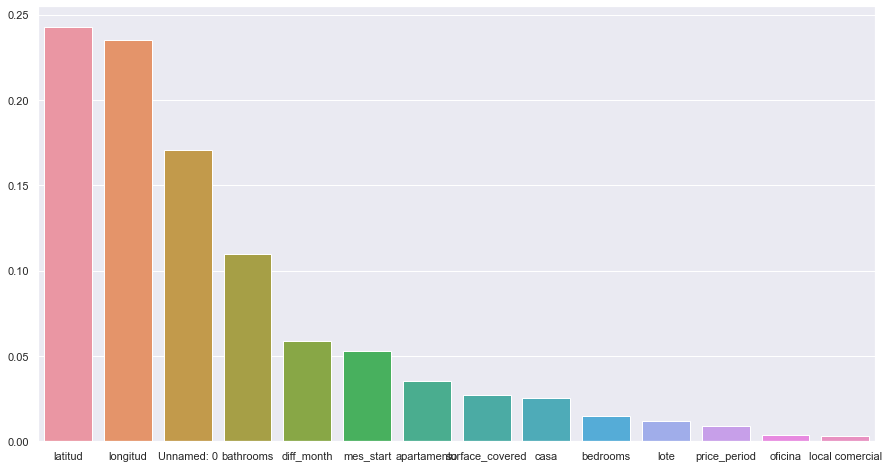

In [18]:
importances = clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()

Vemos estimators

In [19]:
clf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

Elegimos uno de los estimators y evaluamos su desempeño sobre train y test

In [20]:
clf_tree = clf.estimators_[50]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1224821422,
 'splitter': 'best'}

Medimos el acuracy de test y de trein

In [21]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9372405821467976
0.8199705774181685


c:\Users\Gise\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Hacemos la curva de validación/complejidad del modelo Tandom Forest en función del número de estimadores

In [22]:
train_accuracy = []
test_accuracy = []
oob_scores = []

N_estimadores = [2,10,50,100,150]#,10,25,50,100,250,500,1000]
for estimadores in N_estimadores:
    print(estimadores)
    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_)
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


2
10


c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


50
100
150


Plotiamos la curva de validación

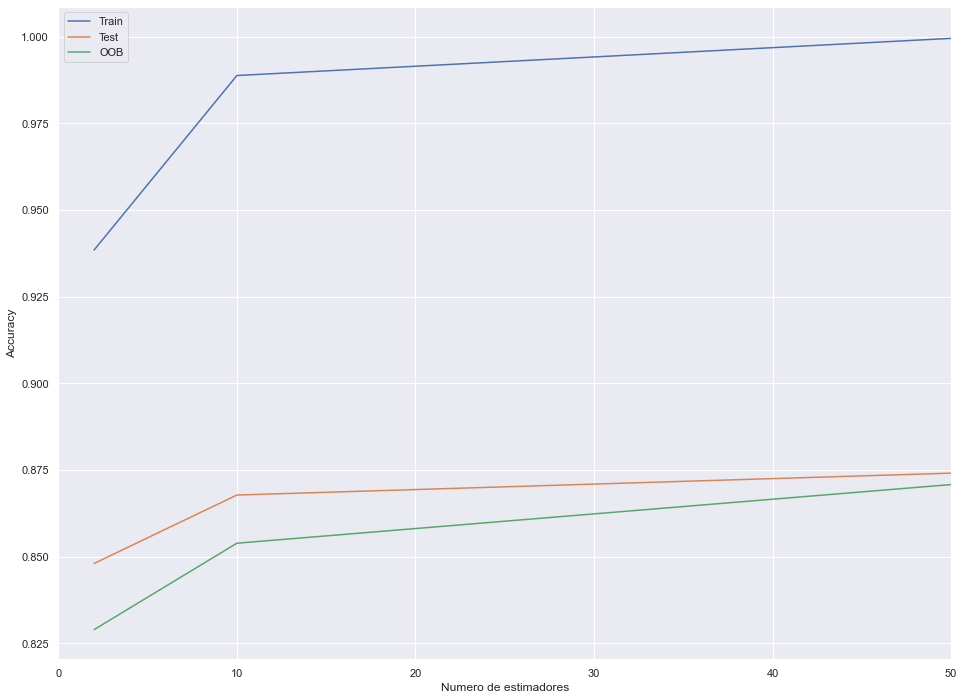

In [23]:
plt.figure(figsize = (16,12))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0,50)
plt.show()

Hacemos una curva de aprendizaje

In [24]:
clf = RandomForestClassifier(n_estimators=15, n_jobs=-1, oob_score= True, random_state = 42)

train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring = 'accuracy', cv=5)

c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably me

Plotiamos los resultados obtenidos 

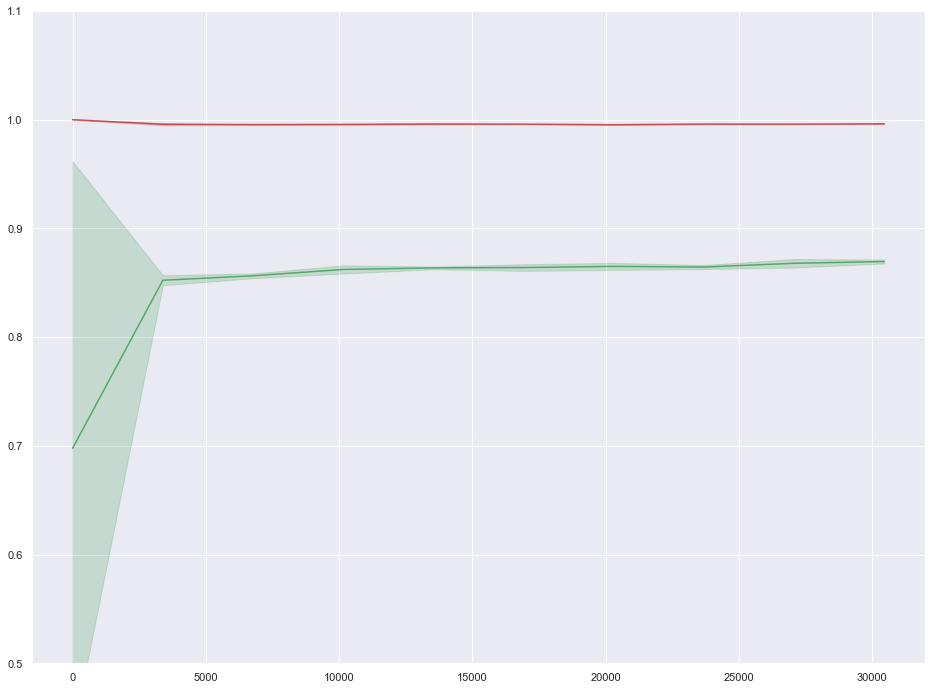

In [25]:
plt.figure(figsize = (16,12))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")

plt.ylim(0.5,1.1)
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

y = train['target']
X = train.drop(columns=['target'])

X_scaled = MinMaxScaler().fit_transform(X)

##### *`5.3 Predecimos con regresion logística`*

c:\Users\Gise\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Gise\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


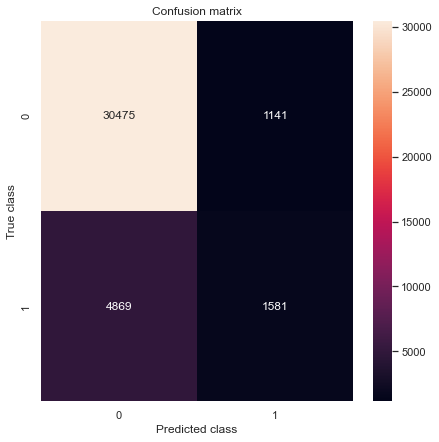

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     31616
           1       0.58      0.25      0.34      6450

    accuracy                           0.84     38066
   macro avg       0.72      0.60      0.63     38066
weighted avg       0.81      0.84      0.81     38066



In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
#definimos nuestras etiquetas y features

#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)
 
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)
 
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(7, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)
#https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/

##### *`5.3 Predecimos con Árboles de decisiones y medimos su exactitud`*

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import clear_output

In [29]:
#Guardamos en listas las posibilidades diferentes que tenemos en medida de que parte del dataset tomamos como entrenamiento y cual de test
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,30,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    #validación cruzada en el árbol de decision
    #cv = indica en la cantidad de partes que sera dividido el dataset
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 100.0%


In [30]:
# 

clf = RandomForestClassifier(n_estimators=3, n_jobs=-1, oob_score= True, random_state = 42)

train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring = 'accuracy', cv=5)




c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably me

A continuación, utilizaremos la llamada curva de aprendizaje. Esta es una herramienta que nos muestra el _trade-off_ entre varianza y sesgo de nuestro modelo. Mientras el score del random forest este más cerca de uno, el modelo ajusta mejor la función que esta representando. Muestra el score de la cross-validation y el del entrenamiento de un estimador variando la cantidad de muestras de set de entrenamiento.

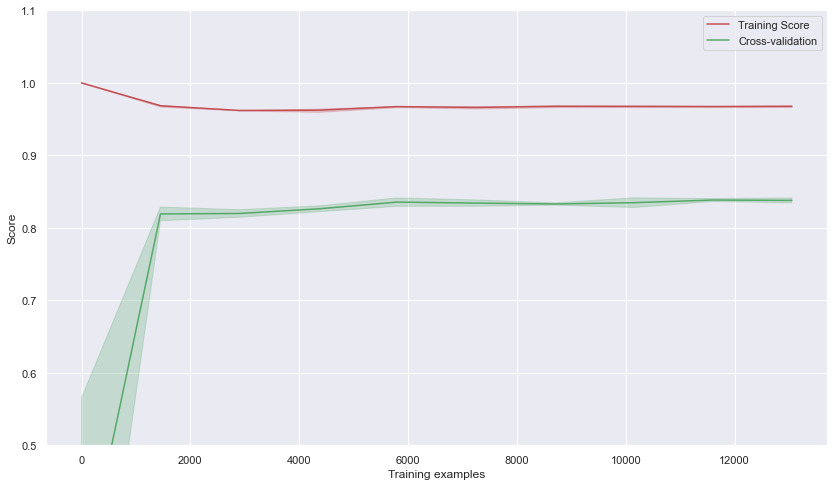

In [31]:
# Graficamos la curva de aprendizaje

plt.figure(figsize = (14,8))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")

plt.ylim(0.5,1.1)
plt.legend(['Training Score','Cross-validation'])
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.show()

##### **ENSAMBLE**


- - -

##### **`STACKING`**

El método Stacking (Stacked Generalization o Meta Ensamblado) implica combinar las predicciones de distintos modelos de Machine Learning con un mismo conjunto de datos, tal como Bagging y Boosting.

Stacking suele utilizar modelos diferentes -pueden no ser todos, necesariamente, árboles de decisión- y se ajustan al mismo conjunto de datos. Por otro lado, esta técnica usa solo un modelo para aprender cómo ensamblar de mejor manera las predicciones de los modelos que contribuyen.

La arquitectura de este método implica dos o más *modelos base* (nivel 0) y un *metamodelo* (nivel 1) que combina las predicciones de los modelos base.

Este enfoque puede ser utilizado tanto en escenarios supervisados como no supervisados y su rendimiento aumentará cuanto más diversos sean los modelos del nivel 0.



In [32]:
#IMPORTAMOS LAS LIBRERÍAS NECESARIAS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier # Modelo 1
from sklearn.svm import SVC # Modelo 2
from sklearn.tree import DecisionTreeClassifier # Modelo 3
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression # Metamodelo

##### **Modelo 1: K-nearest neighbors**

In [33]:
# Se define el clasificador
knn = KNeighborsClassifier(1)

# Se entrena el modelo
knn.fit(X_train, y_train)

# Predicciones
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Desempeño del modelo en train, calculando la precisión (accuracy)
knn_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del modelo en test, calculando la precisión (accuracy)
knn_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Desempeño del modelo para el Training set: ',knn_train_accuracy)
print('Desempeño del modelo para el Test set: ',knn_test_accuracy)

Desempeño del modelo para el Training set:  1.0
Desempeño del modelo para el Test set:  0.7263174486418326


##### **Modelo 2: Support vector machine**

In [34]:
# Se define el clasificador
svm = SVC(gamma=2, C=1)

# Se entrena el modelo
svm.fit(X_train, y_train)

# Predicciones
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Desempeño del modelo en train, calculando la precisión (accuracy)
svm_train_accuracy = accuracy_score(y_train, y_train_pred) 

# Desempeño del modelo en test, calculando la precisión (accuracy)
svm_test_accuracy = accuracy_score(y_test, y_test_pred)


print('Desempeño del modelo para el Training set: ',svm_train_accuracy)
print('Desempeño del modelo para el Test set: ',svm_test_accuracy)

##### **Modelo 3: Árboles de decisión**

In [ ]:
# Se define el clasificador
dt = DecisionTreeClassifier(max_depth=9)

# Se entrena el modelo
dt.fit(X_train, y_train)

# Predicciones
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Desempeño del modelo entrenado, calculando la precisión (accuracy)
dt_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del modelo testeado, calculando la precisión (accuracy)
dt_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Desempeño del modelo para el Training set: ',dt_train_accuracy)
print('Desempeño del modelo para el Test set: ',dt_test_accuracy)

Desempeño del modelo para el Training set:  0.8919333088145152
Desempeño del modelo para el Test set:  0.8629222928597698


##### **Metamodelo: Regresión logística**

In [ ]:
# Se define la lista de estimadores con los 3 modelos generados
estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm),
    ('dt',dt)]

# Se genera el modelo apilado (stacking)
# Se estima con los 3 modelos generados
# El estimador de la predicción final será una regresión logística (metamodelo).
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression())

# Se entrena el metamodelo
stack_model.fit(X_train, y_train)

# Predicciones
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Desempeño del metamodelo en train, calculando la precisión (accuracy)
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del metamodelo en test, calculando la precisión (accuracy)
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Desempeño del metamodelo para el Training set: ',stack_model_train_accuracy)
print('Desempeño del metamodelo para el Test set: ',stack_model_test_accuracy)

Desempeño del metamodelo para el Training set:  0.9157778595071717
Desempeño del metamodelo para el Test set:  0.8669153575369096


#### ***`6. Dataset Test`***

##### *`6.1 Acomodamos la forma del dataset`*

In [ ]:
#Cargo el dataset de test
test=carga_datos(r'C:\Users\Gise\Desktop\Data Since\LABS\Individuales\02\Datathon-mainmio\Datathon-main\properties_colombia_test.csv')

In [ ]:
test.columns

Index(['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
       'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'currency',
       'price_period', 'title', 'description', 'property_type',
       'operation_type', 'geometry'],
      dtype='object')

In [ ]:
train.columns

Index(['latitud', 'longitud', 'bedrooms', 'bathrooms', 'surface_covered',
       'price_period', 'target', 'mes_start', 'diff_month', 'apartamento',
       'casa', 'local comercial', 'lote', 'oficina'],
      dtype='object')

In [ ]:
test=limpieza_fechas(test)
df=test
df=transformacion_fechas(df)
test=df

In [ ]:
test.price_period.replace('Mensual',1,inplace=True)
test.price_period.fillna(0,inplace=True)
test.price_period.astype('int32')
test.head()

,Unnamed: 0,id,ad_type,created_on,lat,lon,l1,l2,l3,l4,...,currency,price_period,title,description,property_type,operation_type,geometry,ano_start,mes_start,diff_month
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,4.722000,-74.075000,Colombia,Cundinamarca,Bogotá D.C,Zona Noroccidental,...,COP,0.0,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722),2020,9,0.0
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,NaN,NaN,Colombia,Antioquia,Envigado,NaN,...,COP,1.0,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY,2020,10,0.0
2,119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,6.259253,-75.628381,Colombia,Antioquia,Medellín,San Javier,...,COP,0.0,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267),2020,10,0.0
3,227304,RUV1P+3UOmNdlJ9fBdWFyw==,Propiedad,2020-12-10,6.203000,-75.556000,Colombia,Antioquia,Medellín,El Poblado,...,COP,0.0,Lote En Venta En Medellin La Calera Cod. VRPR6330,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,Lote,Venta,POINT (-75.556 6.203),2020,12,25.0
4,228600,ifKutEAhyovuDNeYrFFV+A==,Propiedad,2020-12-10,NaN,NaN,Colombia,Antioquia,Medellín,NaN,...,COP,0.0,Casa en Venta Ubicado en MEDELLIN,Codigo Inmueble 505457 Casa en venta en el sec...,Casa,Venta,POINT EMPTY,2020,12,0.0


In [ ]:
#Le realizo las mismas modificaciones que a train
test.property_type.replace('Finca','Otro',inplace=True)
test.property_type.replace('Finca','Otro',inplace=True)
test.property_type.replace('Finca','Otro',inplace=True)
test.property_type.replace('Parqueadero','Otro',inplace=True)
#Agregamos al df
test= pd.concat([test, pd.get_dummies(test['property_type'])], axis=1)
test.drop('Otro',axis=1,inplace=True)
test.head(2)

,Unnamed: 0,id,ad_type,created_on,lat,lon,l1,l2,l3,l4,...,operation_type,geometry,ano_start,mes_start,diff_month,Apartamento,Casa,Local comercial,Lote,Oficina
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,4.722,-74.075,Colombia,Cundinamarca,Bogotá D.C,Zona Noroccidental,...,Venta,POINT (-74.075 4.722),2020,9,0.0,0,1,0,0,0
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,NaN,NaN,Colombia,Antioquia,Envigado,NaN,...,Venta,POINT EMPTY,2020,10,0.0,1,0,0,0,0


In [ ]:
test.columns

Index(['Unnamed: 0', 'id', 'ad_type', 'created_on', 'lat', 'lon', 'l1', 'l2',
       'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'currency', 'price_period', 'title',
       'description', 'property_type', 'operation_type', 'geometry',
       'ano_start', 'mes_start', 'diff_month', 'Apartamento', 'Casa',
       'Local comercial', 'Lote', 'Oficina'],
      dtype='object')

In [ ]:
#Borro las columnas
test.drop(['Unnamed: 0', 'id', 'ad_type', 'created_on', 'l1', 'l2',
       'l3', 'l4', 'l5', 'l6', 'rooms', 
       'surface_total', 'currency', 'title',
       'description', 'property_type', 'operation_type', 'geometry',
       'ano_start'],axis=1,inplace=True)


In [ ]:
test.shape,train.shape

((65850, 13), (54380, 14))

In [ ]:
#Cambio los nombres de las columnas
train.rename(columns={'lat':'latitud','lon':'longitud'},inplace=True)

In [ ]:
df_test_predict=pd.DataFrame(y_test_pred)

In [ ]:
df_test_predict.rename({0:'pred'},axis=1,inplace=True)

In [ ]:
df_test_predict.head(3)

,pred
0,1
1,0
2,0


In [ ]:
df_test_predict.to_csv('sgisela945.csv', index=False)

##### ***`7. Pipline`***

In [ ]:
train=train.sample(frac=0.4)
#Definimos los conjuntos de entrenamiento
X=train.drop('target',axis=1)
y=train['target']

In [ ]:
#dividimos los datos en entrenamiento y prueba
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [ ]:
#iniciamos el scaler
scater=StandardScaler()
#iniciamos el model
knn=KNeighborsClassifier()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
#Operaciones en orden
operation= [('scater',scater),('knn',knn)]
#configuramos el pipline
pipe=Pipeline(operation)


Hyper parameter tuning

In [ ]:
#Estos son los parámetros que se pueden modificar en el clasificador KNN
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
#modificaremos el 'n_neighbors'
k_values=list(range(1,20))

In [ ]:
#Establecer el parámetro del grid
param_grid={'n_neighbors':k_values}

In [ ]:
#Estos son los parámetros del grid
param_grid={'knn__n_neighbors':k_values}

In [ ]:
#Poniendo todo junto
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring='recall')

In [ ]:
#Entrenamos el pipline
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scater', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='recall')

In [ ]:
#model best parameters
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scater', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scater': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scater__copy': True,
 'scater__with_mean': True,
 'scater__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [ ]:
#printing de recall associated whith each k
rec=full_cv_classifier.cv_results_['mean_test_score']
k_rec = pd.DataFrame({'k_values':k_values,'Recall':rec})
k_rec=k_rec.set_index('k_values').transpose()
round(k_rec,2)

k_values,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Recall,0.46,0.27,0.42,0.29,0.39,0.29,0.36,0.28,0.34,0.27,0.31,0.26,0.29,0.25,0.28,0.24,0.27,0.24,0.27


### MODELO DEFINITIVO

In [ ]:
#iniciar y configurar operaciones
scaler=StandardScaler()
knn18=KNeighborsClassifier(n_neighbors=1)
operations=[('scaler',scaler),('knn18',knn18)]
#configuramos pipline
pipe=Pipeline(operations)
#entrenamos de nuevo al modelo
pipe.fit(X_train,y_train)
Pipeline(steps=[('scaler',StandardScaler(),('knn18',KNeighborsClassifier(n_neighbors=1)))])
#hago prediccion del conjunto de prueba
pipe_pred=pipe.predict(X_test)
#Classification report
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7171
           1       0.49      0.48      0.48      1530

    accuracy                           0.82      8701
   macro avg       0.69      0.68      0.69      8701
weighted avg       0.82      0.82      0.82      8701



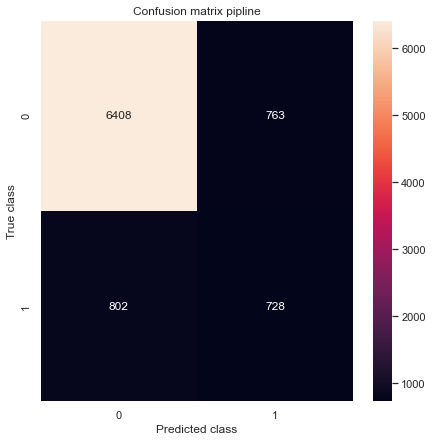

In [ ]:
conf_matrix = confusion_matrix(y_test, pipe_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix pipline")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

##### ***`8. Creacion de Escenarios con Pipline`***

In [ ]:
#CREO TRES MODELOS
#MODELO1
pipeline_lr=Pipeline([('scalar1',StandardScaler()),('pca1',PCA(n_components=2)),('lr_classifier',LogisticRegression(random_state=0))])
#MODELO 2
pipeline_dt=Pipeline([('scalar2',StandardScaler()),('pca2',PCA(n_components=2)),('dt_classifier',DecisionTreeClassifier())])
#MODELO 3
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),('pca3',PCA(n_components=2)),('rf_classifier',RandomForestClassifier())])

#Hago la lista de pipelines
pipelines=[pipeline_lr,pipeline_dt,pipeline_randomforest]
#Hago una lista de resultados
best_acc=0
best_classifier=0
best_pipline=''
#Diccionario de Pipeline y tipos de clasificador para facilitar la referencia
pipe_dict={0:'Logistic Regresion',1:'Decision Tree',2:'RandomForest'}
#Entrenamiento de pipelines
for pipe in pipelines:
    pipe.fit(X_train,y_train)

for i, model in enumerate (pipelines):
    print('{}Accuracy para el conjunto de prueba: {}'.format(pipe_dict[i],model.score(X_test,y_test)))



Logistic RegresionAccuracy para el conjunto de prueba: 0.8241581427422136
Decision TreeAccuracy para el conjunto de prueba: 0.7810596483162855
RandomForestAccuracy para el conjunto de prueba: 0.822893920239053


In [ ]:
for i in enumerate(pipelines):
    if model.score(X_test,y_test)>best_acc:
        best_acc=model.score(X_test,y_test)
        best_pipline=model
        best_classifier=i
best_classifier
#print('El clasificador con el mejor accuracy:',(pipe_dict[best_classifier]))

(0,
 Pipeline(steps=[('scalar1', StandardScaler()), ('pca1', PCA(n_components=2)),
                 ('lr_classifier', LogisticRegression(random_state=0))]))

##### ***En resumen, lo que hicimos fue stackear o apilar 3 modelos distintos generando predicciones, para luego utilizar como predicción final el metamodelo que, en este caso, fue de regresión logística.***

####     ***`Espero que les haya sido leve!`***
